# Cryotherapy Dataset Data Set

Abstract: This dataset contains information about wart treatment results of 90 patients using cryotherapy.



Source: https://archive.ics.uci.edu/ml/datasets.php

    

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [2]:
data = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00429/Cryotherapy.xlsx")

In [3]:
data.head(5)

,sex,age,Time,Number_of_Warts,Type,Area,Result_of_Treatment
0,1,35,12.00,5,1,100,0
1,1,29,7.00,5,1,96,1
2,1,50,8.00,1,3,132,0
3,1,32,11.75,7,3,750,0
4,1,67,9.25,1,1,42,0




Independent variables:
- sex
- age
- Time
- Number_of_Warts
- Type
- Area

Dependent variable:
- Result_of_Treatment - binary values: 0 for negative and 1 for positive result, which implies binary classification problem

In [4]:
for column_name, series in data.items():
    print(20*"@"+column_name+20*"@")
    print(series.describe())

@@@@@@@@@@@@@@@@@@@@sex@@@@@@@@@@@@@@@@@@@@
count    90.000000
mean      1.477778
std       0.502304
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       2.000000
Name: sex, dtype: float64
@@@@@@@@@@@@@@@@@@@@age@@@@@@@@@@@@@@@@@@@@
count    90.000000
mean     28.600000
std      13.360852
min      15.000000
25%      18.000000
50%      25.500000
75%      35.000000
max      67.000000
Name: age, dtype: float64
@@@@@@@@@@@@@@@@@@@@Time@@@@@@@@@@@@@@@@@@@@
count    90.000000
mean      7.666667
std       3.406661
min       0.250000
25%       4.562500
50%       8.500000
75%      10.687500
max      12.000000
Name: Time, dtype: float64
@@@@@@@@@@@@@@@@@@@@Number_of_Warts@@@@@@@@@@@@@@@@@@@@
count    90.000000
mean      5.511111
std       3.567155
min       1.000000
25%       2.000000
50%       5.000000
75%       8.000000
max      12.000000
Name: Number_of_Warts, dtype: float64
@@@@@@@@@@@@@@@@@@@@Type@@@@@@@@@@@@@@@@@@@@
count    90.000000
mean      1.700000
std

In [5]:
for column_name, series in data.isna().items():
    print(f"In {column_name} series found:\t{sum(series)} Nan values")
    if sum(series)>0:
        series = series.fillna(series.mean())

In sex series found:	0 Nan values
In age series found:	0 Nan values
In Time series found:	0 Nan values
In Number_of_Warts series found:	0 Nan values
In Type series found:	0 Nan values
In Area series found:	0 Nan values
In Result_of_Treatment series found:	0 Nan values


C:\Users\sedzielskim\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\sedzielskim\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\sedzielskim\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\sedzielskim\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.war

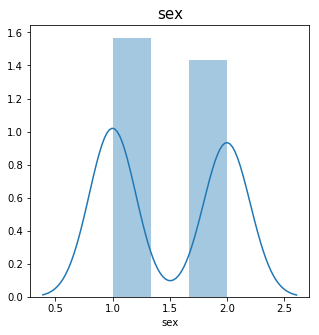

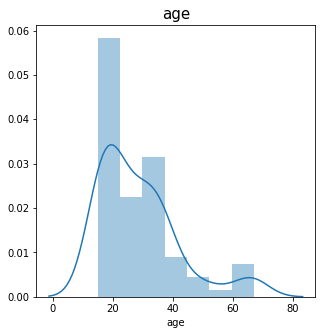

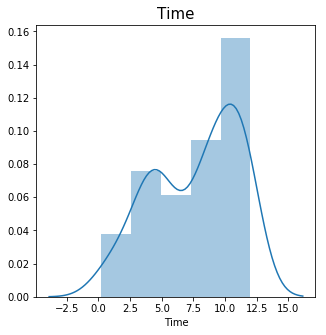

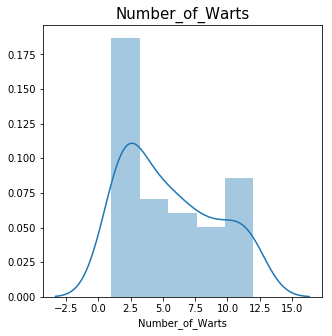

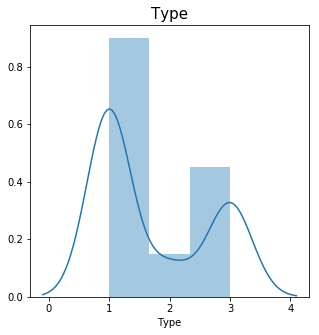

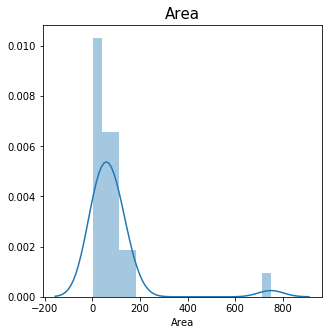

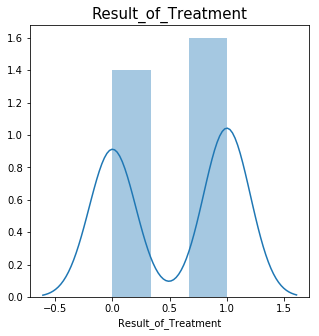

In [6]:
for column_name, series in data.items():
    plt.figure(figsize=[5,5])
    sns.distplot(series)
    plt.title(column_name, fontsize=15)

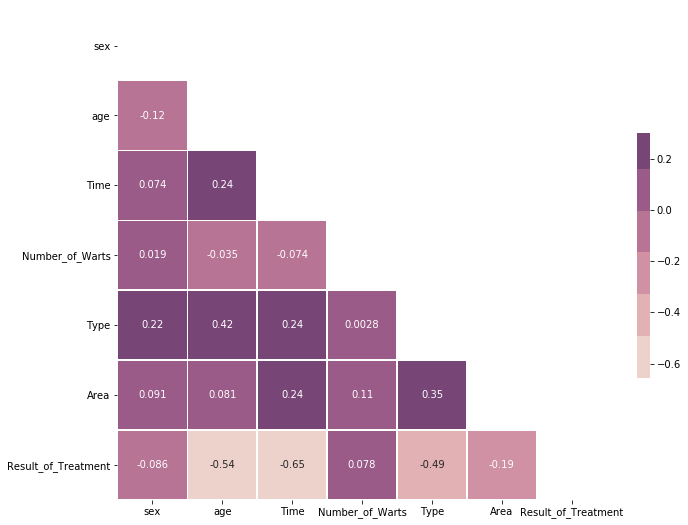

In [7]:
corr = data.corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.cubehelix_palette(8)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [8]:
corr

,sex,age,Time,Number_of_Warts,Type,Area,Result_of_Treatment
sex,1.000000,-0.115185,0.074417,0.018952,0.219970,0.091213,-0.086203
age,-0.115185,1.000000,0.236305,-0.034797,0.415536,0.080915,-0.542780
Time,0.074417,0.236305,1.000000,-0.074354,0.235056,0.241559,-0.654147
Number_of_Warts,0.018952,-0.034797,-0.074354,1.000000,0.002784,0.108762,0.078273
Type,0.219970,0.415536,0.235056,0.002784,1.000000,0.354398,-0.485030
Area,0.091213,0.080915,0.241559,0.108762,0.354398,1.000000,-0.188886
Result_of_Treatment,-0.086203,-0.542780,-0.654147,0.078273,-0.485030,-0.188886,1.000000


In [9]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from keras.losses import categorical_crossentropy, sparse_categorical_crossentropy
from keras.utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping

C:\Users\sedzielskim\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [10]:
#!pip install -U scikit-learn

In [11]:
scaler = MinMaxScaler()

X = data.drop(columns=["Result_of_Treatment"])
X = scaler.fit_transform(X)

y = data["Result_of_Treatment"]
y = to_categorical(y, num_classes=None)

print(f'Independent variables matrix size:\t{X.shape}\nDependent variable matrix size:\t{y.shape}')

Independent variables matrix size:	(90, 6)
Dependent variable matrix size:	(90, 2)


In [12]:
kFold = KFold(n_splits=5, shuffle=True, random_state=432)

In [13]:
def define_model(input_shape = X.shape[1]):
    model = Sequential()
    model.add(Dense(50, input_dim=input_shape, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='softmax'))
    
    model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [15]:
epochs = [25, 50, 75, 100, 150, 200, 300, 400, 500]
batch_size = [8, 16, 32, 64, 128]


model = KerasClassifier(build_fn=define_model, verbose=0)
param_grid = dict(batch_size=batch_size, epochs=epochs)

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kFold, verbose=2, n_jobs=1)

grid_result = grid.fit(X, y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] batch_size=8, epochs=25 .........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......................... batch_size=8, epochs=25, total=   0.8s
[CV] batch_size=8, epochs=25 .........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] .......................... batch_size=8, epochs=25, total=   0.8s
[CV] batch_size=8, epochs=25 .........................................
[CV] .......................... batch_size=8, epochs=25, total=   0.8s
[CV] batch_size=8, epochs=25 .........................................
[CV] .......................... batch_size=8, epochs=25, total=   0.9s
[CV] batch_size=8, epochs=25 .........................................
[CV] .......................... batch_size=8, epochs=25, total=   0.9s
[CV] batch_size=8, epochs=50 .........................................
[CV] .......................... batch_size=8, epochs=50, total=   1.3s
[CV] batch_size=8, epochs=50 .........................................
[CV] .......................... batch_size=8, epochs=50, total=   1.1s
[CV] batch_size=8, epochs=50 .........................................
[CV] .......................... batch_size=8, epochs=50, total=   1.1s
[CV] batch_size=8, epochs=50 .........................................
[CV] .

[CV] ........................ batch_size=16, epochs=200, total=   1.7s
[CV] batch_size=32, epochs=25 ........................................
[CV] ......................... batch_size=32, epochs=25, total=   0.7s
[CV] batch_size=32, epochs=25 ........................................
[CV] ......................... batch_size=32, epochs=25, total=   0.7s
[CV] batch_size=32, epochs=25 ........................................
[CV] ......................... batch_size=32, epochs=25, total=   0.7s
[CV] batch_size=32, epochs=25 ........................................
[CV] ......................... batch_size=32, epochs=25, total=   0.9s
[CV] batch_size=32, epochs=25 ........................................
[CV] ......................... batch_size=32, epochs=25, total=   0.7s
[CV] batch_size=32, epochs=50 ........................................
[CV] ......................... batch_size=32, epochs=50, total=   0.8s
[CV] batch_size=32, epochs=50 ........................................
[CV] .

[CV] ........................ batch_size=64, epochs=200, total=   1.3s
[CV] batch_size=64, epochs=200 .......................................
[CV] ........................ batch_size=64, epochs=200, total=   1.3s
[CV] batch_size=64, epochs=200 .......................................
[CV] ........................ batch_size=64, epochs=200, total=   1.3s
[CV] batch_size=128, epochs=25 .......................................
[CV] ........................ batch_size=128, epochs=25, total=   0.7s
[CV] batch_size=128, epochs=25 .......................................
[CV] ........................ batch_size=128, epochs=25, total=   0.9s
[CV] batch_size=128, epochs=25 .......................................
[CV] ........................ batch_size=128, epochs=25, total=   0.7s
[CV] batch_size=128, epochs=25 .......................................
[CV] ........................ batch_size=128, epochs=25, total=   0.7s
[CV] batch_size=128, epochs=25 .......................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  2.8min finished


In [25]:
best_batchsize = grid_result.best_params_["batch_size"]
best_epochs = grid_result.best_params_["epochs"]
print(f'Best score evaluated on train set:\t{grid_result.best_score_}\nBest parameters:\t{grid_result.best_params_}')

Best score evaluated on train set:	0.9111110925674438
Best parameters:	{'batch_size': 16, 'epochs': 150}


In [26]:
best_batchsize

16

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, shuffle=True, random_state=420)

In [30]:
dnn = define_model()
history = dnn.fit(X_train, y_train, validation_data=[X_test, y_test],  epochs=best_epochs, batch_size=best_batchsize)

Train on 63 samples, validate on 27 samples
Epoch 1/150
63/63 [==============================] - 0s 2ms/step - loss: 0.6981 - accuracy: 0.4921 - val_loss: 0.7052 - val_accuracy: 0.4444
Epoch 2/150
63/63 [==============================] - 0s 175us/step - loss: 0.6916 - accuracy: 0.4603 - val_loss: 0.6968 - val_accuracy: 0.4815
Epoch 3/150
63/63 [==============================] - 0s 175us/step - loss: 0.6892 - accuracy: 0.4921 - val_loss: 0.6886 - val_accuracy: 0.4815
Epoch 4/150
63/63 [==============================] - 0s 159us/step - loss: 0.6739 - accuracy: 0.6190 - val_loss: 0.6824 - val_accuracy: 0.5556
Epoch 5/150
63/63 [==============================] - 0s 142us/step - loss: 0.6567 - accuracy: 0.6349 - val_loss: 0.6767 - val_accuracy: 0.5185
Epoch 6/150
63/63 [==============================] - 0s 159us/step - loss: 0.6559 - accuracy: 0.5714 - val_loss: 0.6705 - val_accuracy: 0.5185
Epoch 7/150
63/63 [==============================] - 0s 175us/step - loss: 0.6498 - accuracy: 0.6667

63/63 [==============================] - 0s 175us/step - loss: 0.3165 - accuracy: 0.8730 - val_loss: 0.3998 - val_accuracy: 0.8148
Epoch 58/150
63/63 [==============================] - 0s 190us/step - loss: 0.3024 - accuracy: 0.8730 - val_loss: 0.3972 - val_accuracy: 0.8148
Epoch 59/150
63/63 [==============================] - 0s 222us/step - loss: 0.2659 - accuracy: 0.9048 - val_loss: 0.4031 - val_accuracy: 0.8148
Epoch 60/150
63/63 [==============================] - 0s 190us/step - loss: 0.2660 - accuracy: 0.8889 - val_loss: 0.4027 - val_accuracy: 0.8148
Epoch 61/150
63/63 [==============================] - 0s 127us/step - loss: 0.2675 - accuracy: 0.8571 - val_loss: 0.4018 - val_accuracy: 0.8148
Epoch 62/150
63/63 [==============================] - 0s 159us/step - loss: 0.2644 - accuracy: 0.9048 - val_loss: 0.3985 - val_accuracy: 0.8148
Epoch 63/150
63/63 [==============================] - 0s 159us/step - loss: 0.2468 - accuracy: 0.9048 - val_loss: 0.4020 - val_accuracy: 0.8148
Epoch

63/63 [==============================] - 0s 143us/step - loss: 0.1712 - accuracy: 0.9524 - val_loss: 0.3528 - val_accuracy: 0.8889
Epoch 114/150
63/63 [==============================] - 0s 143us/step - loss: 0.1465 - accuracy: 0.9206 - val_loss: 0.3656 - val_accuracy: 0.8889
Epoch 115/150
63/63 [==============================] - 0s 143us/step - loss: 0.1538 - accuracy: 0.9365 - val_loss: 0.3718 - val_accuracy: 0.8889
Epoch 116/150
63/63 [==============================] - 0s 159us/step - loss: 0.1372 - accuracy: 0.9206 - val_loss: 0.3603 - val_accuracy: 0.8889
Epoch 117/150
63/63 [==============================] - 0s 159us/step - loss: 0.1337 - accuracy: 0.9048 - val_loss: 0.3544 - val_accuracy: 0.8889
Epoch 118/150
63/63 [==============================] - 0s 127us/step - loss: 0.1567 - accuracy: 0.9048 - val_loss: 0.3467 - val_accuracy: 0.8889
Epoch 119/150
63/63 [==============================] - 0s 142us/step - loss: 0.1482 - accuracy: 0.9365 - val_loss: 0.3481 - val_accuracy: 0.8889

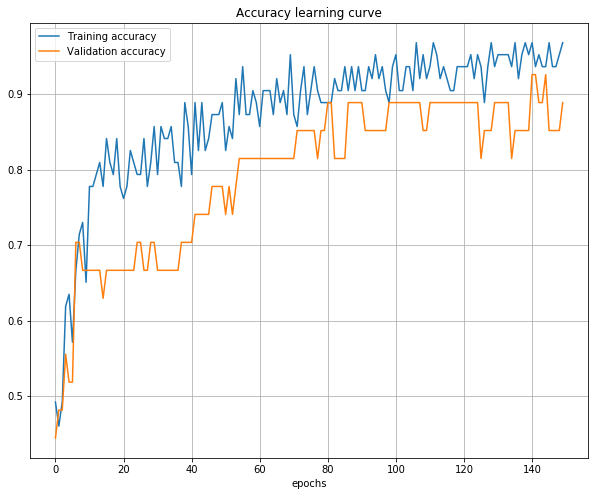

In [31]:
plt.figure(figsize=[10,8])
plt.title("Accuracy learning curve")
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel("epochs")
plt.legend()
plt.grid()

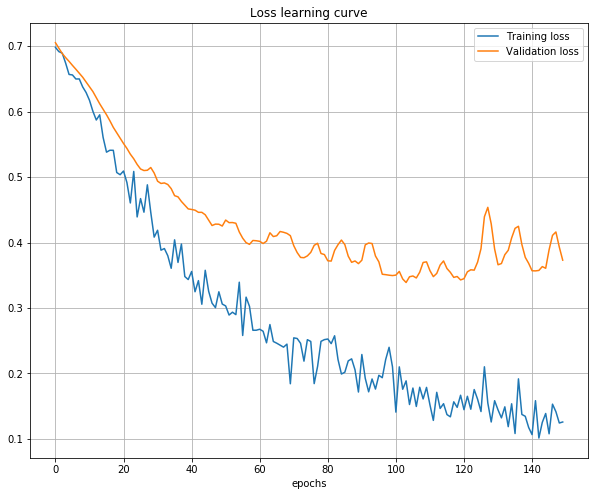

In [32]:
plt.figure(figsize=[10,8])
plt.title("Loss learning curve")
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel("epochs")
plt.legend()
plt.grid()

# Confusion matrix

In [33]:
prediction = dnn.predict(X_test, batch_size=16)

In [48]:
y_test = [np.argmax(x) for x in y_test]
y_predicted = [np.argmax(x) for x in prediction]

In [45]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', fontsize=15)
    plt.xlabel('Predicted label', fontsize=15)

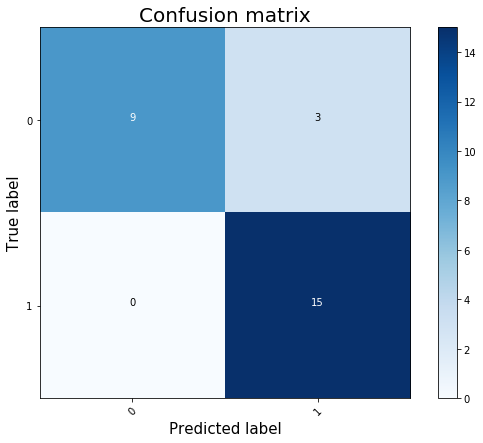

In [46]:
plt.figure(figsize=[8,6])
cm = confusion_matrix(y_test, y_predicted)
plot_confusion_matrix(cm, classes=range(2))

Processing data set is small, nevertheless results are good enough. Validation accuracy at the level of almost 0.9 is higly satisfactory.

Bigger size of train and test data subsets should result in lower loss factor and higher accuracy.